<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

## 0. python imports & setup

for learning purposes, libraries will be imported inside its corresponding usage section...

## 1. data loading

In [61]:
import pandas as pd
import numpy as np

* diamonds: labeled data we can use for training and testing
* diamonds_predict: diamonds to predict its price and upload result to Kaggle

In [62]:
diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds_predict = pd.read_csv('../data/diamonds_predict.csv')

## 2. features modification

In [63]:
# Creating new variables for diamonds

In [64]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
color_dictionary ={'D' : 2, 'E' : 2, 'F' : 2, 'G' :1, 'H' :1, 'I' :1, 'J':1 } 
  
# Add a new column named 'color_simplifyed' 
diamonds['color_simplifyed'] = diamonds['color'].apply(set_value, args =(color_dictionary, ))
diamonds_predict['color_simplifyed'] = diamonds_predict['color'].apply(set_value, args =(color_dictionary, ))

In [65]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
cut_dictionary ={'Ideal' : 5, 'Premium' : 4, 'Very Good' : 3, 'Good' :2, 'Fair' :1 } 
  
# Add a new column named 'cut_numeric' 
diamonds['cut_numeric'] = diamonds['cut'].apply(set_value, args =(cut_dictionary, )) 
diamonds_predict['cut_numeric'] = diamonds_predict['cut'].apply(set_value, args =(cut_dictionary, ))

In [66]:
# Add a new column named 'cut_and_carat' 
diamonds['cut_and_carat'] = diamonds['cut_numeric']*diamonds['carat']
diamonds_predict['cut_and_carat'] = diamonds_predict['cut_numeric']*diamonds_predict['carat']

In [67]:
# Add a new column named 'x minus y squared' 
diamonds['x_minus_y_squared'] = (diamonds['x']-diamonds['y'])**2
diamonds_predict['x_minus_y_squared'] = (diamonds_predict['x']-diamonds_predict['y'])**2

In [68]:
# Create a new column called based on the value of another column
diamonds['roundness'] = np.where(diamonds.x_minus_y_squared <= 0.025, 1, 0)
diamonds_predict['roundness'] = np.where(diamonds_predict.x_minus_y_squared <= 0.025, 1, 0)

In [69]:
# Add a new column named 'xyz' 
diamonds['xyz'] = (diamonds['x']*diamonds['y']*diamonds['z'])
diamonds['xyz'] = diamonds['xyz'].replace(0,0.1)
diamonds_predict['xyz'] = (diamonds_predict['x']*diamonds_predict['y']*diamonds_predict['z'])
diamonds_predict['xyz'] = diamonds_predict['xyz'].replace(0,0.1)

In [70]:
# Add a new column named 'carat_volume_cut' 
diamonds['carat_volume_cut'] = diamonds['cut_and_carat']*diamonds['xyz']
diamonds_predict['carat_volume_cut'] = diamonds_predict['cut_and_carat']*diamonds_predict['xyz']

In [71]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
clarity_dictionary ={'IF' : 3, 'VVS1' : 3, 'VVS2' : 3, 'VS1' : 2, 'VS2' : 2,'SI1':1, 'SI2' :1, 'I1' :0} 
  
# Add a new column named 'clarity_simplifyed' 
diamonds['clarity_simplifyed'] = diamonds['clarity'].apply(set_value, args =(clarity_dictionary, ))
diamonds_predict['clarity_simplifyed'] = diamonds_predict['clarity'].apply(set_value, args =(clarity_dictionary, ))

In [72]:
# Add a new column named 'combine_color_clarity_cut' 
diamonds['combine_color_clarity_cut'] = 2*diamonds['clarity_simplifyed']+diamonds['color_simplifyed']+10*diamonds['cut_numeric']
diamonds_predict['combine_color_clarity_cut'] = 2*diamonds_predict['clarity_simplifyed']+diamonds_predict['color_simplifyed']+7*diamonds['cut_numeric']

## 3. covariance matrix

In [73]:
print (NUM_FEATS)

['carat', 'depth', 'table', 'x', 'y', 'z', 'color_simplifyed', 'cut_numeric', 'cut_and_carat', 'x_minus_y_squared', 'xyz', 'clarity_simplifyed', 'combine_color_clarity_cut']


In [119]:
a=0
for data in NUM_FEATS:
    a=a+1
    print(f'{a}: {data}')


1: carat
2: depth
3: table
4: x
5: y
6: z
7: color_simplifyed
8: cut_numeric
9: cut_and_carat
10: x_minus_y_squared
11: xyz
12: clarity_simplifyed
13: combine_color_clarity_cut


In [75]:
var_list=[]
var={}
for data in NUM_FEATS:
    var[data]=diamonds[data].values
    var_list.append(var[data])

In [76]:
type((var['x']))
len(var_list)

13

In [77]:
var_array=np.array(var_list)

In [78]:
covMatrix = np.cov(var_array,bias=True)


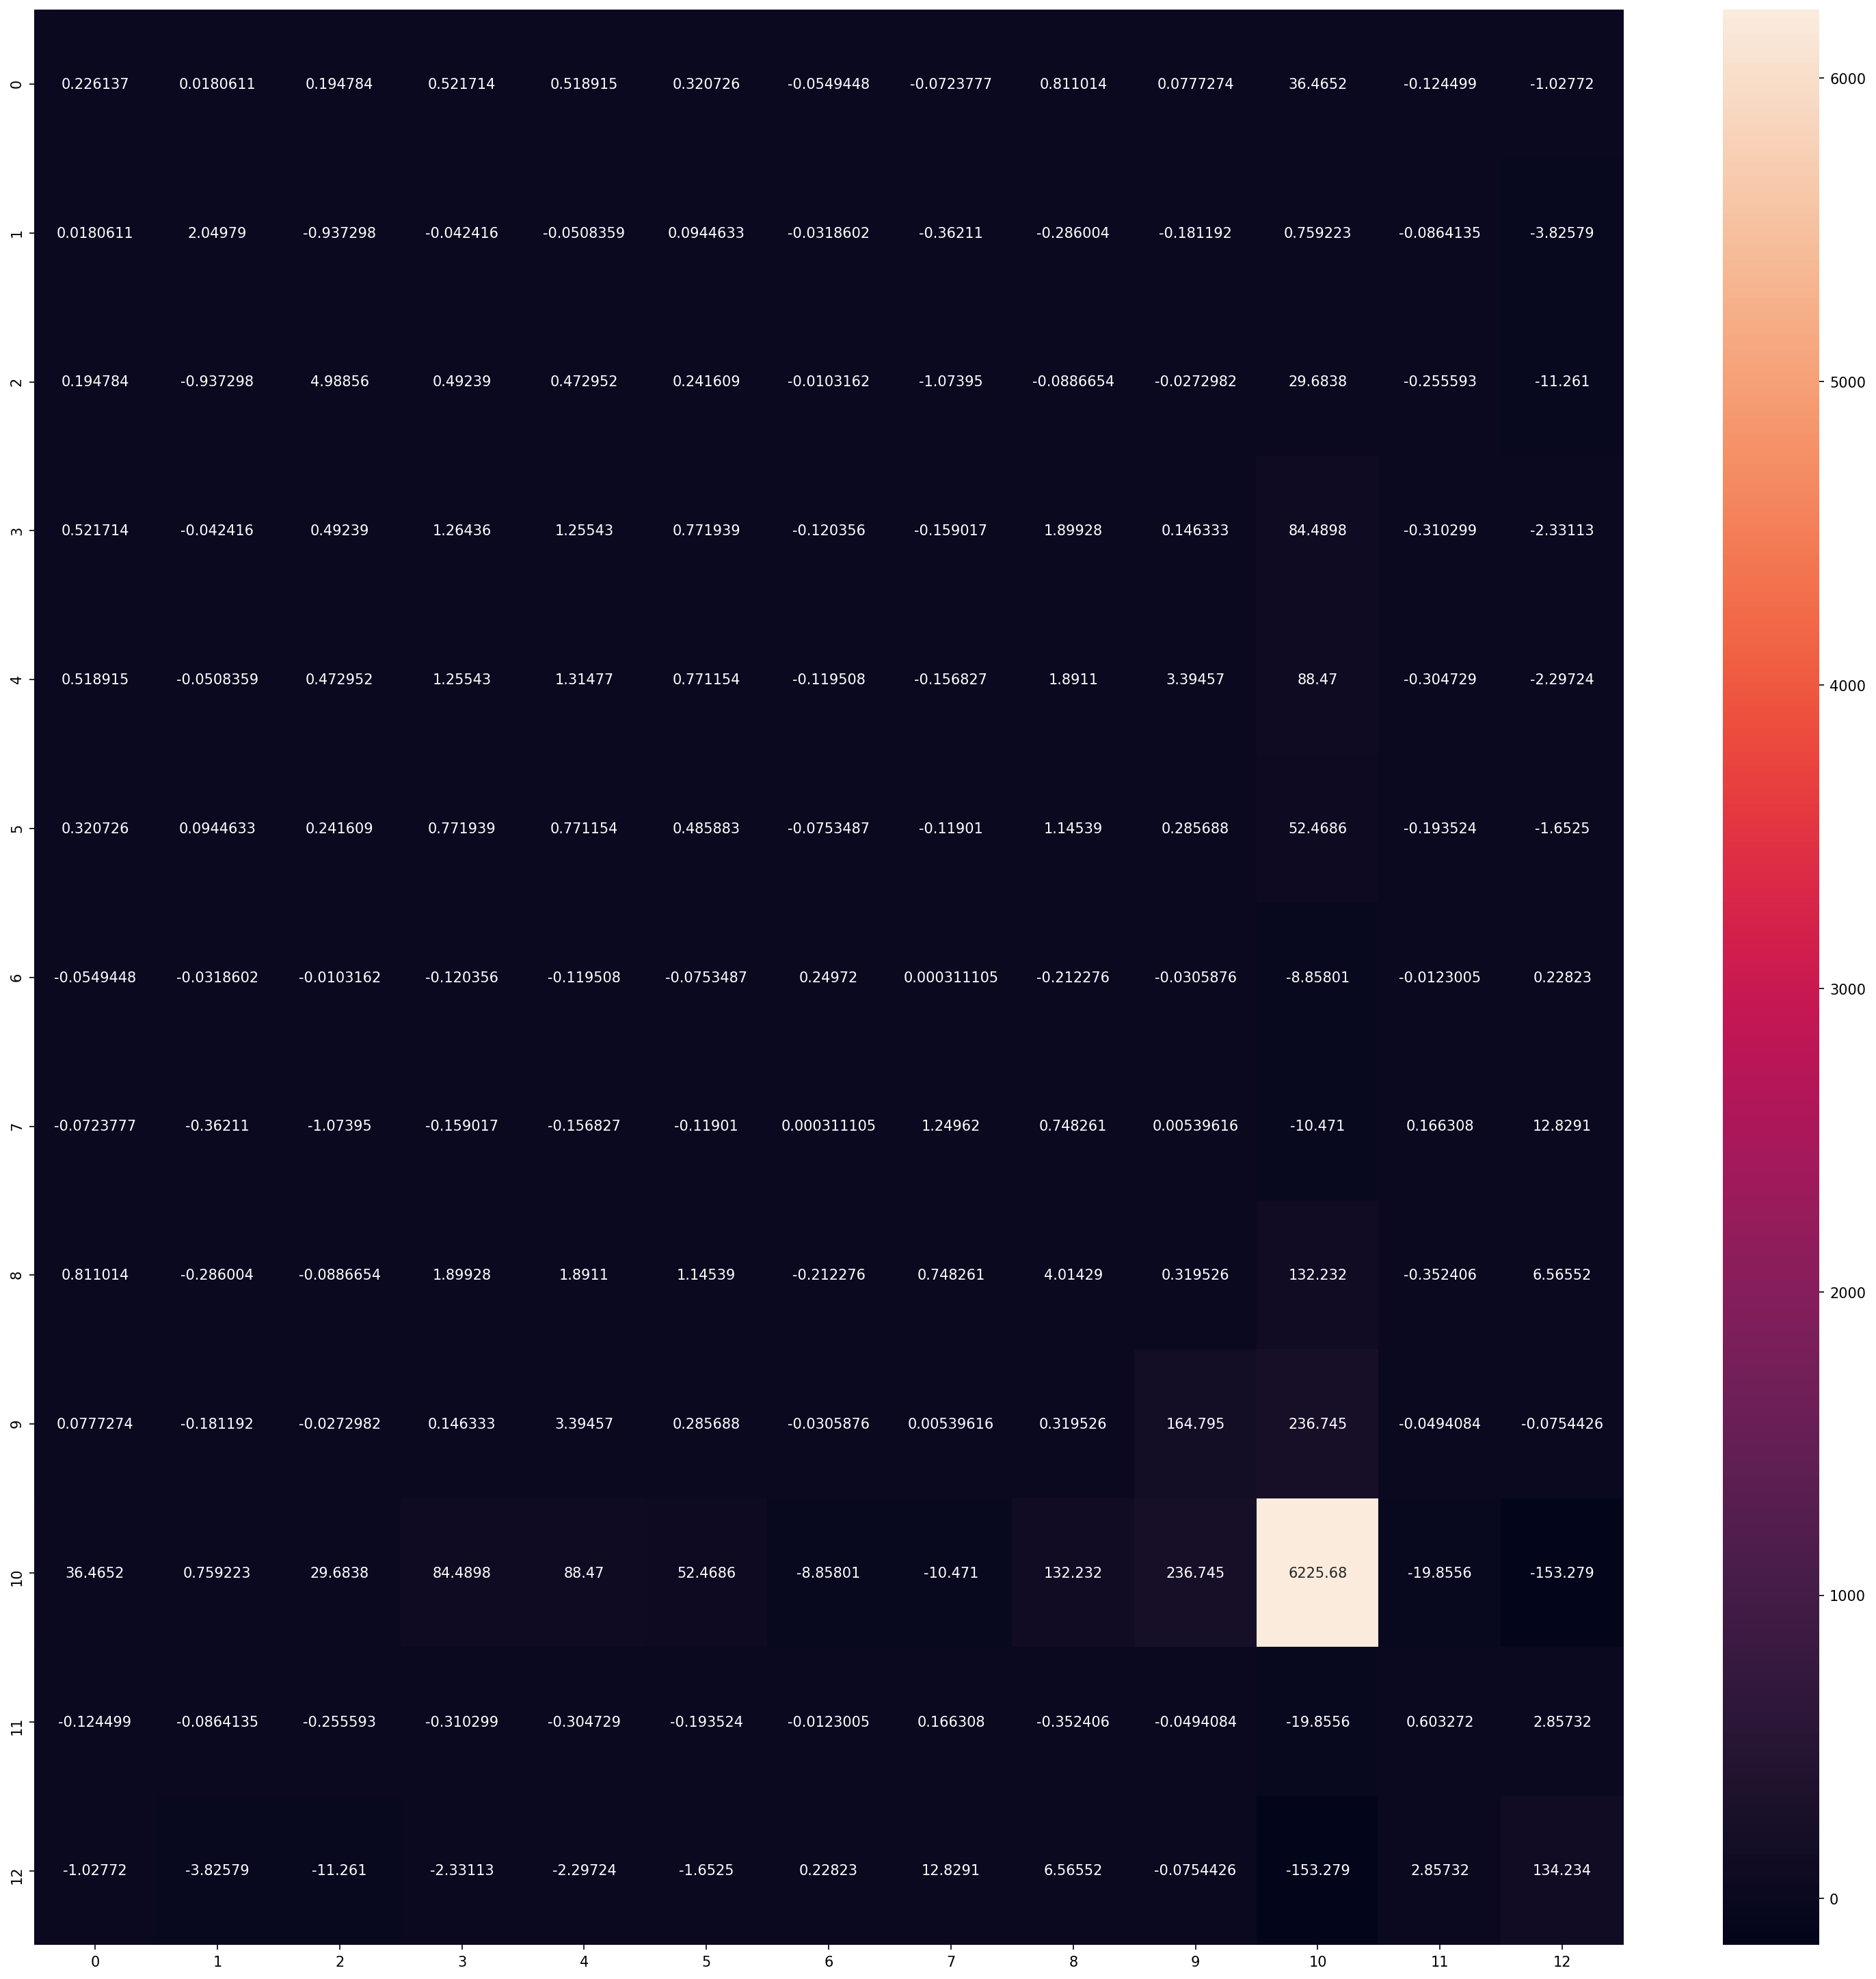

In [79]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=150, facecolor='w', edgecolor='k')
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [80]:
diamonds_predict.head().T

,0,1,2,3,4
id,0,1,2,3,4
carat,0.79,1.2,1.57,0.9,0.5
cut,Very Good,Ideal,Premium,Very Good,Very Good
color,F,J,H,F,F
clarity,SI1,VS1,SI1,SI1,VS1
depth,62.7,61,62.2,63.8,62.9
table,60,57,61,54,58
x,5.82,6.81,7.38,6.09,5.05
y,5.89,6.89,7.32,6.13,5.09
z,3.67,4.18,4.57,3.9,3.19


In [81]:
diamonds.shape

(40455, 19)

In [82]:
diamonds_predict.shape

(13485, 19)

as you can see, there are both categorical and numerical columns...

## 2. eda

this section is up to you! this guided lesson is about a machine learning pipeline...

## 3. ml preprocessing

in this section I will teach how to use scikit-learn's Pipiline and ColumnTransformer, one of the best practices for composing preprocessing and modeling in a single and elegand class... pay attention as it is hard to understand...

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

let's identify numerical and categorical features...

In [84]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   carat                      40455 non-null  float64
 1   cut                        40455 non-null  object 
 2   color                      40455 non-null  object 
 3   clarity                    40455 non-null  object 
 4   depth                      40455 non-null  float64
 5   table                      40455 non-null  float64
 6   price                      40455 non-null  int64  
 7   x                          40455 non-null  float64
 8   y                          40455 non-null  float64
 9   z                          40455 non-null  float64
 10  color_simplifyed           40455 non-null  int64  
 11  cut_numeric                40455 non-null  int64  
 12  cut_and_carat              40455 non-null  float64
 13  x_minus_y_squared          40455 non-null  flo

In [85]:
# Total selection

In [86]:
'''
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','color_simplifyed','cut_numeric','cut_and_carat','x_minus_y_squared','roundness','xyz','carat_volume_cut','clarity_simplifyed','combine_color_clarity_cut']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'
'''

"\nNUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','color_simplifyed','cut_numeric','cut_and_carat','x_minus_y_squared','roundness','xyz','carat_volume_cut','clarity_simplifyed','combine_color_clarity_cut']\nCAT_FEATS = ['cut', 'color', 'clarity']\nFEATS = NUM_FEATS + CAT_FEATS\nTARGET = 'price'\n"

In [87]:
# Feature selection

In [88]:
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','color_simplifyed','cut_numeric','cut_and_carat','x_minus_y_squared','xyz','clarity_simplifyed','combine_color_clarity_cut']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'

In [89]:
'''
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','cut_and_carat','x_minus_y_squared','carat_volume_cut']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'
#562

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-89-4554016711b1>, line 6)

In [90]:
'''
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','color_simplifyed','cut_numeric','cut_and_carat','x_minus_y_squared','roundness','xyz','carat_volume_cut','clarity_simplifyed']
CAT_FEATS = []
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'
#849

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-90-ac6d0f7885b5>, line 6)

In [91]:
'''
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','color_simplifyed','cut_and_carat','roundness','xyz','carat_volume_cut']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'
#571

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-91-b67d2f0e45de>, line 6)

In [92]:
'''
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z','color_simplifyed','cut_numeric','cut_and_carat','x_minus_y_squared','roundness','xyz','carat_volume_cut']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'
#564

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-92-58e966f38ea0>, line 6)

let's define a preprocessing transformer for numerical columns...

In [93]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

let's define a preprocessing transformer for categorical columns...

In [94]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

let's join these transformers using a `ColumnTransformer`:

In [95]:
preprocessor =ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

inspecting the full preprocessor:

In [96]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z',
                                  'color_simplifyed', 'cut_numeric',
                                  'cut_and_carat', 'x_minus_y_squared', 'xyz',
                                  'clarity_simplifyed',
                                  'combine_color_clarity_cut']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneH

how does this preprocessing looks like?

In [97]:

type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

at least in this case, it is at the cost of interpretability of transformed DataFrame...

In [98]:
pd.DataFrame(data=preprocessor.fit_transform(diamonds)).head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657,-0.967096,0.085178,0.897154,-0.005195,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259,-0.967096,-0.809387,-1.039390,-0.005250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891,-0.967096,-2.598516,-1.164167,-0.004689,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607,1.034023,-1.703951,-1.109265,-0.005195,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274,-0.967096,0.979742,1.026923,-0.005195,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 4. train a simple model

first, lets train a simple model using holdout, train - test split...

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
diamonds_train, diamonds_test = train_test_split(diamonds)

In [101]:
print(diamonds_train.shape)
print(diamonds_test.shape)

(30341, 19)
(10114, 19)


In [102]:
diamonds_test_validation, diamonds_test_pure=train_test_split(diamonds_test, test_size=0.5)

In [103]:
print(diamonds_train.shape)
print(diamonds_test_validation.shape)
print(diamonds_test_pure.shape)

(30341, 19)
(5057, 19)
(5057, 19)


let's choose a model from scikit-learn cheatsheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## list of models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor




In [104]:
model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor',RandomForestRegressor(n_estimators=512, max_depth=16) )])

In [105]:
model.fit(diamonds_train[FEATS], diamonds_train[TARGET]);

## 5. check model performance on test and train data

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
y_test = model.predict(diamonds_test[FEATS]).clip(300,18000)
y_train = model.predict(diamonds_train[FEATS]).clip(300,18000)

In [108]:
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=diamonds_test[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=diamonds_train[TARGET], squared=False)}")

test error: 544.8712259707125
train error: 248.06495013994476


In [109]:
y_test = model.predict(diamonds_test_validation[FEATS]).clip(300,18000)
y_train = model.predict(diamonds_train[FEATS]).clip(300,18000)

In [110]:
print(f"test validation error: {mean_squared_error(y_pred=y_test, y_true=diamonds_test_validation[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=diamonds_train[TARGET], squared=False)}")

test validation error: 544.4333375502005
train error: 248.06495013994476


## 6. check model performance using cross validation

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
scores = cross_val_score(model, 
                         diamonds[FEATS], 
                         diamonds[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [113]:
import numpy as np
np.mean(-scores)

551.5811097528094

## 7. optimize model using grid search

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'regressor__n_estimators': [128,256, 512],
    'regressor__max_depth': [4,8,16],
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=18)

grid_search.fit(diamonds[FEATS], diamonds[TARGET])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.6min
/home/davidgozalo/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed: 14.2min remaining:   50.2s
[Parallel(n_jobs=-1)]: Done  90 out

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['carat',
                                                                                'depth',
                                                                                'table',
                                                                                'x',
              

In [49]:
grid_search.best_params_

{'regressor__n_estimators': 512,
 'regressor__max_depth': 16,
 'preprocessor__num__imputer__strategy': 'median'}

In [50]:
grid_search.best_score_

-551.1499608847907

## 7. run the model with all the data using obtained best grid search parameters

In [114]:
model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor',RandomForestRegressor(n_estimators=512, max_depth=16) )])

In [115]:
model.fit(diamonds[FEATS], diamonds[TARGET]);

In [116]:
y_pred=model.predict(diamonds_predict[FEATS]).clip(275,18500)

In [117]:
submission_df = pd.DataFrame({'id': diamonds_predict['id'], 'price': y_pred})

In [118]:
submission_df.to_csv('diamonds X', index=False)

## 8. prepare submission

In [ ]:
y_pred = grid_search.predict(diamonds_predict[FEATS])

In [ ]:
submission_df = pd.DataFrame({'id': diamonds_predict['id'], 'price': y_pred})

In [ ]:
submission_df.head()

In [ ]:
submission_df.describe()

In [ ]:
submission_df.price.clip(325, 18500, inplace=True)

In [ ]:
submission_df.to_csv('diamonds VIII', index=False)

## 9. let's try more models...

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>